In [1]:
import pandas as pd
import numpy as np
from collections import Counter 

In [2]:
df=pd.read_csv("../Ntu_DataSet/Orders.csv")

c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
shopping_data=df.copy()

In [4]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495276 entries, 0 to 5495275
Data columns (total 28 columns):
DateId                         int64
MemberId                       int64
OrderGroupCode                 object
TrackSourceTypeDef             object
TrackDeviceTypeDef             object
PayProfileTypeDef              object
SalesOrderSlaveId              int64
SalePageId                     int64
IsMajor                        bool
IsGift                         bool
IsSalePageGift                 bool
Quantity                       int64
UnitPrice                      float64
PromotionDiscount              float64
ECouponId                      int64
ECouponDiscount                float64
SalesOrderSlaveTotalPayment    float64
SalesOrderSlaveDateTime        object
SalesOrderReceiverId           int64
City                           object
District                       object
ZipCode                        float64
StoreName                      object
StoreId              

In [5]:
shopping_data=shopping_data.ix[:,["DateId","MemberId","OrderGroupCode","IsGift","IsSalePageGift","Quantity","UnitPrice","PromotionDiscount","EcouponId","ECouponDiscount","SalesOrderSlaveTotalPayment"]]

c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:116: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [6]:
shopping_data=shopping_data.fillna(0)

In [7]:
shopping_data['DateId']=pd.to_datetime(shopping_data['DateId'],format="%Y%m%d") 

## (1) 顧客分群

以3個月為單位，故分成  2015/07~2015/09，2015/10~2016/12，2016/01~2016/03，2016/04~2016/06，2016/07~2016/09，2016/10~2017/12，2017/01~2017/03  七個時段

In [67]:
shoppingDataList=[]
timeExpend=["2015-07~2015-09","2015-10~2016-12","2016-01~2016-03","2016-04~2016-06","2016-07~2016-09","2016-10~2017-12","2017-01~2017-03"]
for time in timeExpend:
    time=time.split("~")
    temp=shopping_data[shopping_data["DateId"]>=time[0]]
    temp=temp[temp["DateId"]<=time[1]]
    shoppingDataList.append(temp)

In [145]:
# newCustomer=[]
# activeCustomer=[]
# sleepCustomer=[]
# customerTotal=[]
# customers=[]
# for index,customer in enumerate(shoppingDataList):
#     if index==0:
#         newCustomer.append(set(customer["MemberId"]))
#         customerTotal.append(set(customer["MemberId"]))
#         activeCustomer.append({})
#         sleepCustomer.append({})
#         customers.append(set(customer["MemberId"]))
#     else:
#         tempData=customer.ix[:,["MemberId","OrderGroupCode"]]
# #         customerTotal------->所有的消費者
#         customerTotalItem=customerTotal[index-1] | set(tempData["MemberId"])
#         customerTotal.append(customerTotalItem)
        
# #         newCustomer--------->新增加的消費者且期間銷售次數為一次
#         tempGroup=tempData.groupby("MemberId")["OrderGroupCode"].nunique()
#         newCustomerItem=set(tempGroup.index[tempGroup.values==1]) - customerTotal[index-1] 
#         newCustomer.append(newCustomerItem)
        
# #         activeCustomer------>主要消費者
#         activeCustomerItem=set(tempData["MemberId"])-newCustomerItem
#         activeCustomer.append(activeCustomerItem)
        
# #         sleepCustomer------->上一期有消費但這期沒消費
#         sleepCustomerItem=customerTotal[index-1] - set(tempData["MemberId"])
    
#         sleepCustomer.append(sleepCustomerItem)
# #         customers----------->這期的消費者
#         customers.append(set(tempData["MemberId"]))

In [144]:
# for i in range(len(newCustomer)):
#     print("NewCustomer:",len(set(newCustomer[i])))
#     print("ActiveCustomer:",len(set(activeCustomer[i])))
#     print("SleepCustomer:",len(set(sleepCustomer[i])))
#     print("TotalCustomer:",len(set(customerTotal[i])))
#     print("Customer:",len(set(customers[i])))
#     print("--------------------------------")

In [57]:
datainteresting1=df2.ix[:,["MemberId","MinOrderDate"]]
datainteresting1=datainteresting1.dropna()
datainteresting1=datainteresting1.sort_values(by="MinOrderDate")

c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [198]:
# total_member=answer+wakeUpMember
# total_member1=[]
# for i in range(len(total_member)+1):
#         temp=list(total_member)[0:i]
#         total_member1.append(np.array(temp).sum())
# total_member1=total_member1[1:]
# sleepmember=np.array(total_member1)-answer-wakeUpMember
# tempdic={"Date":DateInteresting,"New":answer,"active":wakeUpMember,"sleepmember":sleepmember}
# tempPan=pd.DataFrame(tempdic)
# for i in range(len(newCustomer)):
#     newCustomerNumber.append(len(set(newCustomer[i])))
#     activeCustomerNumber.append(len(set(activeCustomer[i])))
#     sleepCustomerNumber.append(len(set(sleepCustomer[i])))

In [56]:
datainteresting2=shopping_data.ix[:,["DateId","MemberId"]]
datainteresting2=datainteresting2.dropna()
datainteresting2=datainteresting2.sort_values(by="DateId")

c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [62]:
newCustomerSet=[]
activeCustomerSet=[]
sleepCustomerSet=[]
totalMemberSet=set()
for item in timeExpend:
    time=item.split("~")
    temp=datainteresting1[datainteresting1["MinOrderDate"]>time[0]]
    temp=temp[temp["MinOrderDate"]<time[1]]
    tempSet_new=set(temp["MemberId"])
    newCustomerSet.append(tempSet_new)
    temp=datainteresting2[datainteresting2["DateId"]>time[0]]
    temp=temp[temp["DateId"]<time[1]]
    tempSet_shop=set(temp["MemberId"])
    activeCustomerSet.append(tempSet_shop-tempSet_new)
    totalMemberSet=totalMemberSet|tempSet_shop
    sleepCustomerSet.append(totalMemberSet-tempSet_shop)

In [63]:
newCustomerNumber=[]
activeCustomerNumber=[]
sleepCustomerNumber=[]
for i in range(len(newCustomerSet)):
    newCustomerNumber.append(len(newCustomerSet[i]))
    activeCustomerNumber.append(len(activeCustomerSet[i]))
    sleepCustomerNumber.append(len(sleepCustomerSet[i]))

In [229]:
# temp=tempPan[tempPan["Date"]>"2015-5"]
# temp=temp[temp["Date"]<"2015-12"]
# newCustomerNumber.append(temp["New"].sum())
# activeCustomerNumber.append(temp["active"].sum())
# sleepCustomerNumber.append(temp["sleepmember"].max())

In [231]:
# temp["sleepmember"].max()

120229

In [238]:
# np.array(sleepCustomerNumber)+np.array(activeCustomerNumber)+np.array(sleepCustomerNumber)

array([  83718, 1588708,  403700,  736221, 1041886, 2640956, 1496213],
      dtype=int64)

In [68]:
interest=[]
for customer in shoppingDataList:
    quantity=np.array(customer["Quantity"])
    salesOrderSlaveTotalPayment=np.array(customer["SalesOrderSlaveTotalPayment"])
    interest.append(np.dot(quantity,salesOrderSlaveTotalPayment))

In [234]:
len(interest)

7

In [89]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
def barsplot():
    fig=plt.figure(figsize=(15,20))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    
    x=[x for x in range(1,8)]
    y1=np.array(newCustomerNumber)
    y2=np.array(activeCustomerNumber)
    y3=np.array(sleepCustomerNumber)
    l1=ax1.bar(x, y1, color='green', label='y1')
    l2=ax1.bar(x, y2, bottom=y1, color='red', label='y2')
    l3=ax1.bar(x, y3, bottom=y1+y2, color='blue', label='y3')
    plt.xticks(x, ["2015-07~2015-09","2015-10~2016-12","2016-01~2016-03","2016-04~2016-06","2016-07~2016-09","2016-10~2017-12","2017-01~2017-03"], rotation=0)  
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Custumer Classify")
    plt.legend(handles = [l1,l2,l3], labels = ["newCustomerNumber","activeCustomerNumber","sleepCustomerNumber"],loc="best")
    
    for x,x,x,y1,y2,y3 in zip(x,x,x,y1,y2,y3):
        ax1.text(x ,y1, "%.0f" % y1, ha="center",va="center")
        ax1.text(x ,y2+y1, "%.0f" % y2, ha="center",va="center")
        ax1.text(x ,y2+y1+y3, "%.0f" % y3, ha="center",va="center")
    ax2.set_xlim([0,8])
    ax2.plot([x for x in range(1,8)], interest, '-o',color='black')
    plt.show()

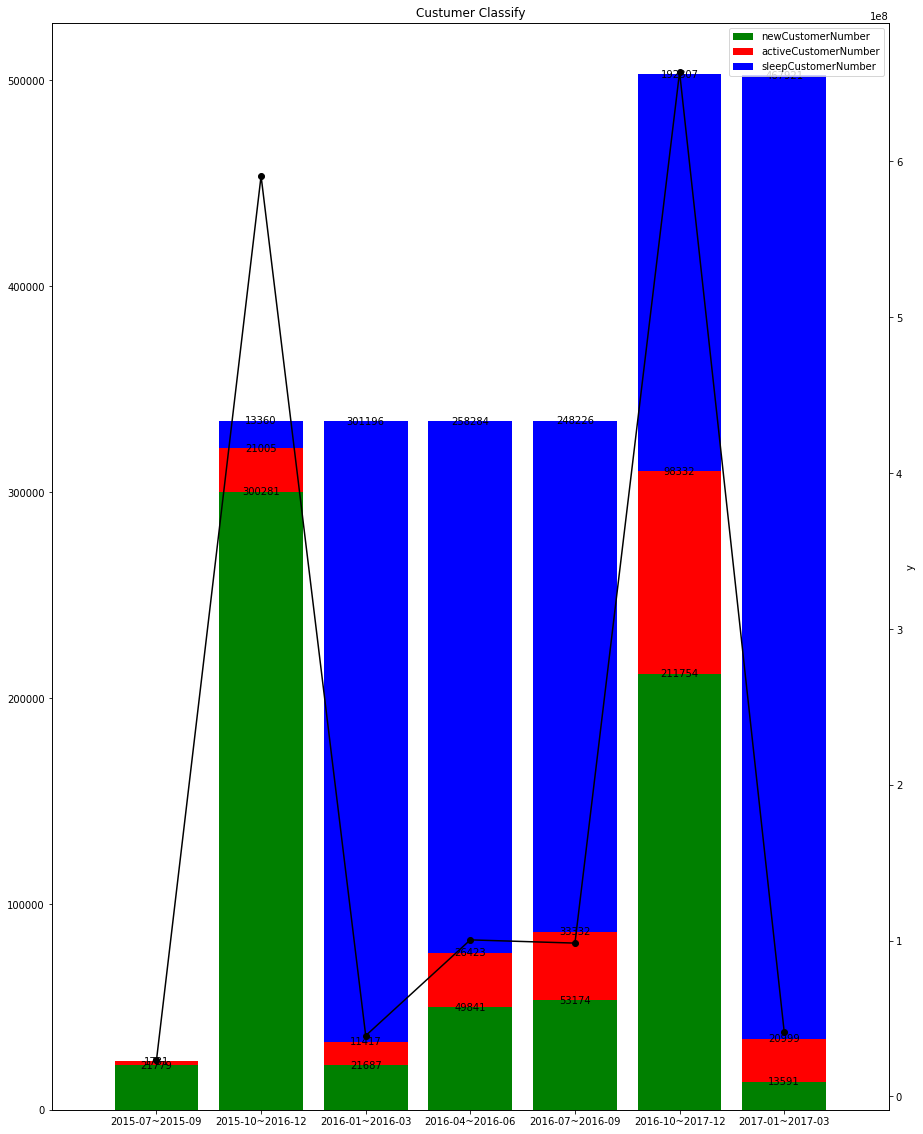

In [90]:
draw=barsplot()

# 2. 促銷對人口流動的影響

##  (1)   促銷活動對新客人數的影響

### (a)  load data

In [8]:
df2=pd.read_csv("../Ntu_DataSet/PromotionOrders.csv")
promotion_data=df2.copy()

In [9]:
promotion_data["PromotionId"]=promotion_data["PromotionId"].astype("str")
del promotion_data["SalesOrderSlaveId"]

In [10]:
promotion_data["PromotionId"].describe()

count     4011064
unique        244
top         34032
freq       189210
Name: PromotionId, dtype: object

In [11]:
promotion_data["DiscountType"].describe()

count     4011064
unique          7
top          滿額折現
freq      1727429
Name: DiscountType, dtype: object

In [12]:
promotion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011064 entries, 0 to 4011063
Data columns (total 12 columns):
PromotionId                                     object
SalesOrderSlavePromotionDiscount                float64
SalesOrderSlavePromotionDiscountAllocated       float64
SalesOrderSlavePromotionDiscountAllocatedQty    int64
SalesOrderSlavePromotionDiscountRate            float64
DiscountType                                    object
PromotionCondition_DiscountPrice                float64
PromotionCondition_DiscountRate                 float64
PromotionCondition_TotalPrice                   float64
PromotionCondition_TotalQty                     int64
PromotionStartDateTime                          object
PromotionEndDateTime                            object
dtypes: float64(6), int64(2), object(4)
memory usage: 367.2+ MB


### (b)  把promotion data重複的刪掉 

In [13]:
PromotionId=promotion_data["PromotionId"].values
# print(1)
DiscountType=promotion_data["DiscountType"].values
# print(1)
PromotionCondition_DiscountPrice=promotion_data["PromotionCondition_DiscountPrice"].values
# print(1)
PromotionCondition_DiscountRate=promotion_data["PromotionCondition_DiscountRate"].values
# print(1)
PromotionCondition_TotalPrice=promotion_data["PromotionCondition_TotalPrice"].values
# print(1)
PromotionCondition_TotalQty=promotion_data["PromotionCondition_TotalQty"].values
# print(1)
PromotionStartDateTime=promotion_data["PromotionStartDateTime"].values
# print(1)
PromotionEndDateTime=promotion_data["PromotionEndDateTime"].values
# print(1)
promotionLs=[]
for promote in np.unique(promotion_data["PromotionId"].values):
    templs=[]
    a=promotion_data["PromotionId"].values
    index=np.argwhere(a==promote)
    index=index[0][0]
    templs.append(PromotionId[index])
    templs.append(DiscountType[index])
    templs.append(PromotionCondition_DiscountPrice[index])
    templs.append(PromotionCondition_DiscountRate[index])
    templs.append(PromotionCondition_TotalPrice[index])
    templs.append(PromotionCondition_TotalQty[index])
    templs.append(PromotionStartDateTime[index])
    templs.append(PromotionEndDateTime[index])
    promotionLs.append(templs)

### (c)  整理資料

In [14]:
promotionData=pd.DataFrame(promotionLs,columns=["PromotionId","DiscountType","PromotionCondition_DiscountPrice","PromotionCondition_DiscountRate","PromotionCondition_TotalPrice","PromotionCondition_TotalQty","PromotionStartDateTime","PromotionEndDateTime"])
promotionData=promotionData.sort_values(by="PromotionStartDateTime")
# promotionDate=promotionData["PromotionStartDateTime"].values,promotionData["PromotionStartDateTime"].values
promotionDate=np.vstack((promotionData["PromotionStartDateTime"].values,promotionData["PromotionEndDateTime"].values)).T

In [15]:
len(promotionDate)

244

In [16]:
from datetime import timedelta, date
promotionTotalDate=[]
promotionTotalDateMatix=[]
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)
for item in promotionDate:
    temp=[]
    a=item[0].split(" ")[0].split("-")
    b=item[1].split(" ")[0].split("-")
    start_dt = date(int(a[0]), int(a[1]), int(a[2]))
    end_dt = date(int(b[0]), int(b[1]),int(b[2]))
    for dt in daterange(start_dt, end_dt):
        promotionTotalDate.append(dt)
        temp.append(dt)
    promotionTotalDateMatix.append(temp)

promotionTotalDateSet=set(promotionTotalDate)
cc=list(set(shopping_data["DateId"].values))
cc.sort()
a=str(cc[0]).split('T')[0].split("-")
b=str(cc[-1]).split('T')[0].split("-")
shoppingTotalDate=set()
start_dt = date(int(a[0]), int(a[1]), int(a[2]))
end_dt = date(int(b[0]), int(b[1]),int(b[2]))
for dt in daterange(start_dt, end_dt):
        shoppingTotalDate.add(dt)
        
promotionTotalDateList=list(promotionTotalDateSet)
promotionTotalDateList.sort()

In [17]:
df2=pd.read_csv("../Ntu_DataSet/Member.csv")
Member=list(df2["MinOrderDate"].dropna())
Member.sort()

c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['2015-05-06',
 '2015-05-06',
 '2015-05-06',
 '2015-05-06',
 '2015-05-06',
 '2015-05-06',
 '2015-05-06',
 '2015-05-07',
 '2015-05-07',
 '2015-05-07',
 '2015-05-07',
 '2015-05-07',
 '2015-05-07',
 '2015-05-07',
 '2015-05-07',
 '2015-05-07',
 '2015-05-07',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-08',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-09',
 '2015-05-10',
 '2015-05-10',
 '2015-05-10',
 '2015-05-10',
 '2015-05-10',
 '2015-05-10',
 '2015-05-10',
 '2015-05-

In [28]:
# from collections import Counter
# aa=np.array(list(Counter(Member).values()))
# base=aa.mean()-aa.std()

In [30]:
# from sympy import *

In [31]:
# a=list(range(244))
# for i in range(len(a)):
#     a[i]=symbols('a['+str(i)+"]")

In [18]:
matrix=[]
for i in range(len(promotionTotalDateMatix)):
    mask = np.isin(promotionTotalDateList,promotionTotalDateMatix[i])
    mask=mask.astype(int)
    matrix.append(list(mask))

In [19]:
answer=np.array(list(Counter(Member).values()))

### (d)  找出能吸引顧客的促消搭配

In [20]:
answer1=answer.copy()
answer1.sort()
answer1

array([   7,   10,   12, ..., 1987, 2008, 2462])

In [21]:
first=list(Counter(Member).keys())[list(Counter(Member).values()).index(answer1[-1])]
second=list(Counter(Member).keys())[list(Counter(Member).values()).index(answer1[-2])]
third=list(Counter(Member).keys())[list(Counter(Member).values()).index(answer1[-3])]
forth=list(Counter(Member).keys())[list(Counter(Member).values()).index(answer1[-4])]
fifth=list(Counter(Member).keys())[list(Counter(Member).values()).index(answer1[-5])]

In [22]:
print("No1.\tDate:"+str(first)+"\t number:"+str(answer1[-1]))
print("No2.\tDate:"+str(second)+"\t number:"+str(answer1[-2]))
print("No3.\tDate:"+str(third)+"\t number:"+str(answer1[-3]))
print("No4.\tDate:"+str(forth)+"\t number:"+str(answer1[-4]))
print("No5.\tDate:"+str(fifth)+"\t number:"+str(answer1[-5]))

No1.	Date:2016-11-11	 number:2462
No2.	Date:2016-07-08	 number:2008
No3.	Date:2016-11-13	 number:1987
No4.	Date:2016-09-28	 number:1852
No5.	Date:2016-09-27	 number:1809


In [23]:
temp=promotionData[promotionData["PromotionStartDateTime"]<first]
firstPromotion=temp[temp["PromotionEndDateTime"]>first]
firstPromotion

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
58,37453,滿額折現,100.0,0.0,888.0,0,2016-11-10 10:00:00.000,2016-11-11 09:59:00.000


In [24]:
temp=promotionData[promotionData["PromotionStartDateTime"]<second]
secondPromotion=temp[temp["PromotionEndDateTime"]>second]
secondPromotion

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
18,20625,任選優惠價,198.0,0.0,0.0,2,2016-03-14 14:00:00.000,2016-11-10 09:59:00.000
26,24782,任選優惠價,550.0,0.0,0.0,2,2016-05-24 16:10:00.000,2016-07-13 17:59:00.000
29,25991,任選優惠價,250.0,0.0,0.0,2,2016-06-08 18:00:00.000,2016-08-17 18:49:00.000
32,26944,任選優惠價,388.0,0.0,0.0,2,2016-06-27 11:00:00.000,2016-07-20 18:05:00.000
35,27904,任選優惠價,299.0,0.0,0.0,2,2016-07-06 18:00:00.000,2016-07-27 18:02:00.000


In [25]:
temp=promotionData[promotionData["PromotionStartDateTime"]<third]
thirdPromotion=temp[temp["PromotionEndDateTime"]>third]
thirdPromotion

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
59,37454,滿額折現,120.0,0.0,1000.0,0,2016-11-11 10:00:00.000,2016-11-14 14:00:00.000


In [26]:
temp=promotionData[promotionData["PromotionStartDateTime"]<forth]
forthPromotion=temp[temp["PromotionEndDateTime"]>forth]
forthPromotion

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
18,20625,任選優惠價,198.0,0.0,0.0,2,2016-03-14 14:00:00.000,2016-11-10 09:59:00.000
36,28348,任選優惠價,550.0,0.0,0.0,2,2016-07-13 18:00:00.000,2016-11-10 09:59:00.000
43,31863,任選優惠價,250.0,0.0,0.0,2,2016-08-31 18:26:00.000,2016-11-10 09:59:00.000
46,33116,任選優惠價,388.0,0.0,0.0,2,2016-09-14 16:36:00.000,2016-10-19 18:30:00.000
48,33467,任選優惠價,299.0,0.0,0.0,2,2016-09-21 18:00:00.000,2016-10-05 18:15:00.000


In [27]:
temp=promotionData[promotionData["PromotionStartDateTime"]<fifth]
fifthPromotion=temp[temp["PromotionEndDateTime"]>fifth]
fifthPromotion

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
18,20625,任選優惠價,198.0,0.0,0.0,2,2016-03-14 14:00:00.000,2016-11-10 09:59:00.000
36,28348,任選優惠價,550.0,0.0,0.0,2,2016-07-13 18:00:00.000,2016-11-10 09:59:00.000
43,31863,任選優惠價,250.0,0.0,0.0,2,2016-08-31 18:26:00.000,2016-11-10 09:59:00.000
46,33116,任選優惠價,388.0,0.0,0.0,2,2016-09-14 16:36:00.000,2016-10-19 18:30:00.000
48,33467,任選優惠價,299.0,0.0,0.0,2,2016-09-21 18:00:00.000,2016-10-05 18:15:00.000


### (e) 假設促銷有加成性，使用linear regression的方尋找每個促銷活動吸引的人數

In [28]:
# equal=[]
# for i in range(len(ee)):
#     equal.append(np.dot(ee[i],a))

In [29]:
# from scipy.optimize import fsolve
# r = scipy.optimize.fsolve(equal,list(Counter(Member).values()))
# print (r)

In [30]:
# a2 = np.array(ee)
# b2 = np.array(list(Counter(Member).values()))
# sol = np.linalg.lstsq(a2,b2)

In [31]:
ee=np.array(matrix).T
ee=ee[0:1076]

In [32]:
ee.shape

(1076, 244)

In [33]:
answer

array([  7,  10,  18, ..., 295, 388, 183])

In [34]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [35]:
clf.fit(ee,answer)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
bestPromotionList=clf.coef_
bestPromotionList.sort()

In [42]:
promotionData[promotionData["PromotionStartDateTime"]==promotionDate[list(clf.coef_).index(bestPromotionList[-1])][0]]

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
242,96537,任選優惠價,198.0,0.0,0.0,2,2018-04-20 14:56:00.000,2018-04-30 10:59:00.000


In [43]:
promotionData[promotionData["PromotionStartDateTime"]==promotionDate[list(clf.coef_).index(bestPromotionList[-2])][0]]

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
241,96536,任選優惠價,250.0,0.0,0.0,2,2018-04-20 14:51:00.000,2018-04-30 10:59:00.000


In [44]:
promotionData[promotionData["PromotionStartDateTime"]==promotionDate[list(clf.coef_).index(bestPromotionList[-3])][0]]

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
240,95771,滿額贈,0.0,0.0,500.0,0,2018-04-17 11:00:00.000,2018-05-02 10:59:00.000


In [45]:
promotionData[promotionData["PromotionStartDateTime"]==promotionDate[list(clf.coef_).index(bestPromotionList[-4])][0]]

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
239,93897,滿額贈,0.0,0.0,1500.0,0,2018-03-30 11:00:00.000,2018-05-02 10:59:00.000


In [46]:
promotionData[promotionData["PromotionStartDateTime"]==promotionDate[list(clf.coef_).index(bestPromotionList[-5])][0]]

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
234,93501,任選優惠價,120.0,0.0,0.0,2,2018-03-27 12:00:00.000,2018-04-30 10:59:00.000
235,93502,任選優惠價,198.0,0.0,0.0,2,2018-03-27 12:00:00.000,2018-04-20 14:55:00.000
236,93503,任選優惠價,250.0,0.0,0.0,2,2018-03-27 12:00:00.000,2018-04-20 14:50:00.000
237,93505,任選優惠價,299.0,0.0,0.0,2,2018-03-27 12:00:00.000,2018-04-30 10:59:00.000
238,93506,任選優惠價,388.0,0.0,0.0,2,2018-03-27 12:00:00.000,2018-04-30 10:59:00.000


##  (2)   促銷活動對沉睡客群喚醒人數的影響

### (a)  找出每天喚醒的人數

In [36]:
dataInterest=shopping_data.ix[:,["DateId","MemberId"]]
dataInterest["DateId"]=pd.to_datetime(dataInterest["DateId"],format="%Y%m%h")

c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [37]:
dateShopping=dataInterest.groupby('DateId').MemberId.nunique()

In [38]:
wakeUpMember=np.array(dateShopping.values)-answer

### (b) 找出能喚醒顧客的促消搭配

In [39]:
wakeUpMember1=wakeUpMember.copy()
wakeUpMember1.sort()

In [40]:
first=list(dateShopping.keys())[list(wakeUpMember).index(wakeUpMember1[-1])]
second=list(dateShopping.keys())[list(wakeUpMember).index(wakeUpMember1[-2])]
third=list(dateShopping.keys())[list(wakeUpMember).index(wakeUpMember1[-3])]
forth=list(dateShopping.keys())[list(wakeUpMember).index(wakeUpMember1[-4])]
fifth=list(dateShopping.keys())[list(wakeUpMember).index(wakeUpMember1[-5])]

In [52]:
print("No1.\tDate:"+str(first)+"\t number:"+str(answer1[-1]))
print("No2.\tDate:"+str(second)+"\t number:"+str(answer1[-2]))
print("No3.\tDate:"+str(third)+"\t number:"+str(answer1[-3]))
print("No4.\tDate:"+str(forth)+"\t number:"+str(answer1[-4]))
print("No5.\tDate:"+str(fifth)+"\t number:"+str(answer1[-5]))

No1.	Date:2017-11-11 00:00:00	 number:2462
No2.	Date:2016-11-11 00:00:00	 number:2008
No3.	Date:2017-11-14 00:00:00	 number:1987
No4.	Date:2017-11-15 00:00:00	 number:1852
No5.	Date:2017-11-12 00:00:00	 number:1809


In [53]:
temp=promotionData[promotionData["PromotionStartDateTime"]<str(first)]
firstPromotion=temp[temp["PromotionEndDateTime"]>str(first)]
firstPromotion

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
145,70160,會員滿額打折,0.0,0.90,1.0,0,2017-09-11 16:00:00.000,2019-09-11 21:57:11.303
146,70161,會員滿額打折,0.0,0.90,2500.0,0,2017-09-11 16:00:00.000,2019-09-11 21:58:53.140
169,76161,滿額贈,0.0,0.00,1000.0,0,2017-11-01 11:00:00.000,2017-11-17 10:59:00.000
170,76167,滿額贈,0.0,0.00,3500.0,0,2017-11-01 11:00:00.000,2017-11-17 10:59:00.000
175,77395,滿件打折,0.0,0.88,0.0,2,2017-11-10 00:00:00.000,2017-11-15 10:59:00.000


In [54]:
temp=promotionData[promotionData["PromotionStartDateTime"]<str(second)]
secondPromotion=temp[temp["PromotionEndDateTime"]>str(second)]
secondPromotion

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
58,37453,滿額折現,100.0,0.0,888.0,0,2016-11-10 10:00:00.000,2016-11-11 09:59:00.000


In [55]:
temp=promotionData[promotionData["PromotionStartDateTime"]<str(third)]
thirdPromotion=temp[temp["PromotionEndDateTime"]>str(third)]
thirdPromotion

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
145,70160,會員滿額打折,0.0,0.90,1.0,0,2017-09-11 16:00:00.000,2019-09-11 21:57:11.303
146,70161,會員滿額打折,0.0,0.90,2500.0,0,2017-09-11 16:00:00.000,2019-09-11 21:58:53.140
169,76161,滿額贈,0.0,0.00,1000.0,0,2017-11-01 11:00:00.000,2017-11-17 10:59:00.000
170,76167,滿額贈,0.0,0.00,3500.0,0,2017-11-01 11:00:00.000,2017-11-17 10:59:00.000
175,77395,滿件打折,0.0,0.88,0.0,2,2017-11-10 00:00:00.000,2017-11-15 10:59:00.000


In [56]:
temp=promotionData[promotionData["PromotionStartDateTime"]<str(forth)]
forthPromotion=temp[temp["PromotionEndDateTime"]>str(forth)]
forthPromotion

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
145,70160,會員滿額打折,0.0,0.90,1.0,0,2017-09-11 16:00:00.000,2019-09-11 21:57:11.303
146,70161,會員滿額打折,0.0,0.90,2500.0,0,2017-09-11 16:00:00.000,2019-09-11 21:58:53.140
169,76161,滿額贈,0.0,0.00,1000.0,0,2017-11-01 11:00:00.000,2017-11-17 10:59:00.000
170,76167,滿額贈,0.0,0.00,3500.0,0,2017-11-01 11:00:00.000,2017-11-17 10:59:00.000
175,77395,滿件打折,0.0,0.88,0.0,2,2017-11-10 00:00:00.000,2017-11-15 10:59:00.000


In [57]:
temp=promotionData[promotionData["PromotionStartDateTime"]<str(fifth)]
fifthPromotion=temp[temp["PromotionEndDateTime"]>str(fifth)]
fifthPromotion

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
145,70160,會員滿額打折,0.0,0.90,1.0,0,2017-09-11 16:00:00.000,2019-09-11 21:57:11.303
146,70161,會員滿額打折,0.0,0.90,2500.0,0,2017-09-11 16:00:00.000,2019-09-11 21:58:53.140
169,76161,滿額贈,0.0,0.00,1000.0,0,2017-11-01 11:00:00.000,2017-11-17 10:59:00.000
170,76167,滿額贈,0.0,0.00,3500.0,0,2017-11-01 11:00:00.000,2017-11-17 10:59:00.000
175,77395,滿件打折,0.0,0.88,0.0,2,2017-11-10 00:00:00.000,2017-11-15 10:59:00.000


### (c) 假設促銷有加成性，使用linear regression的方尋找每個促銷活動喚醒的人數

In [58]:
len(wakeUpMember)

1076

In [59]:
ee.shape

(1076, 244)

In [60]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit(ee,wakeUpMember)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
bestPromotionList=clf.coef_
bestPromotionList.sort()

In [62]:
promotionData[promotionData["PromotionStartDateTime"]==promotionDate[list(clf.coef_).index(bestPromotionList[-1])][0]]

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
242,96537,任選優惠價,198.0,0.0,0.0,2,2018-04-20 14:56:00.000,2018-04-30 10:59:00.000


In [63]:
promotionData[promotionData["PromotionStartDateTime"]==promotionDate[list(clf.coef_).index(bestPromotionList[-2])][0]]

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
241,96536,任選優惠價,250.0,0.0,0.0,2,2018-04-20 14:51:00.000,2018-04-30 10:59:00.000


In [64]:
promotionData[promotionData["PromotionStartDateTime"]==promotionDate[list(clf.coef_).index(bestPromotionList[-3])][0]]

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
240,95771,滿額贈,0.0,0.0,500.0,0,2018-04-17 11:00:00.000,2018-05-02 10:59:00.000


In [65]:
promotionData[promotionData["PromotionStartDateTime"]==promotionDate[list(clf.coef_).index(bestPromotionList[-4])][0]]

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
239,93897,滿額贈,0.0,0.0,1500.0,0,2018-03-30 11:00:00.000,2018-05-02 10:59:00.000


In [66]:
promotionData[promotionData["PromotionStartDateTime"]==promotionDate[list(clf.coef_).index(bestPromotionList[-5])][0]]

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
234,93501,任選優惠價,120.0,0.0,0.0,2,2018-03-27 12:00:00.000,2018-04-30 10:59:00.000
235,93502,任選優惠價,198.0,0.0,0.0,2,2018-03-27 12:00:00.000,2018-04-20 14:55:00.000
236,93503,任選優惠價,250.0,0.0,0.0,2,2018-03-27 12:00:00.000,2018-04-20 14:50:00.000
237,93505,任選優惠價,299.0,0.0,0.0,2,2018-03-27 12:00:00.000,2018-04-30 10:59:00.000
238,93506,任選優惠價,388.0,0.0,0.0,2,2018-03-27 12:00:00.000,2018-04-30 10:59:00.000


# 3. 促銷活動對業績的影響

## (1) 先來看看業績跟換醒人數和新進人數的關係

In [67]:
dataInterest=shopping_data.ix[:,["DateId","MemberId"]]
dataInterest["DateId"]=pd.to_datetime(dataInterest["DateId"],format="%Y%m%d")
DateInteresting=dataInterest.groupby('DateId').MemberId.nunique().keys()

c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [68]:
DatePricePd=shopping_data.groupby(by="DateId")["SalesOrderSlaveTotalPayment"].sum()

In [69]:
tempDic={"time":DateInteresting,"new":answer,"wakeup":wakeUpMember}
tempPan=pd.DataFrame(tempDic)
# tempPan["time"]=tempPan["time"].astype(str)
tempPan["new"]=tempPan["new"].astype(int)
tempPan["wakeup"]=tempPan["wakeup"].astype(int)
tempPan=tempPan.set_index("time")

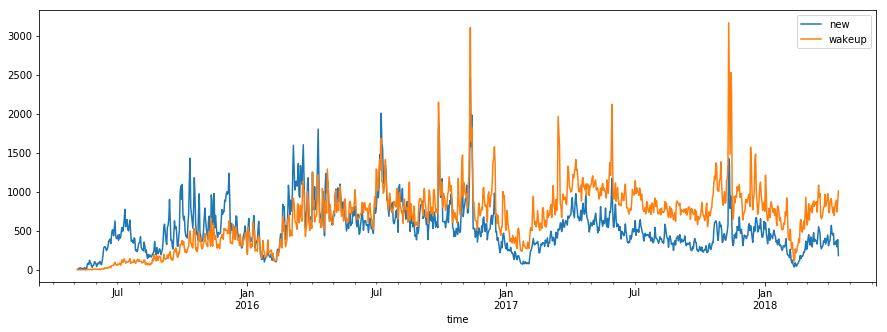

In [70]:
tempPan.plot(figsize=(15,5))

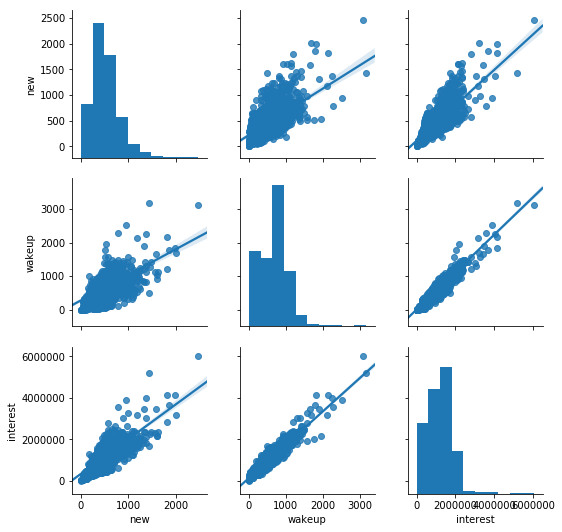

In [71]:
tempPan["interest"]=DatePricePd
import seaborn as sns
sns.pairplot(tempPan, vars=["new","wakeup","interest"],kind='reg')

In [72]:
tempPan.corr()

,new,wakeup,interest
new,1.000000,0.588185,0.763550
wakeup,0.588185,1.000000,0.947732
interest,0.763550,0.947732,1.000000


In [73]:
tempPan.corr('kendall')

,new,wakeup,interest
new,1.000000,0.406034,0.56681
wakeup,0.406034,1.000000,0.79004
interest,0.566810,0.790040,1.00000


In [74]:
tempPan.corr('spearman')

,new,wakeup,interest
new,1.000000,0.562967,0.754965
wakeup,0.562967,1.000000,0.935817
interest,0.754965,0.935817,1.000000


#### Pearson積差相關係數 
兩個連續變量間呈線性相關時，使用Pearson積差相關係數，不滿足積差相關分析的適用條件時，使用Spearman秩相關係數來描述. 

#### Spearman相關係數
Spearman相關係數又稱秩相關係數，是利用兩變量的秩次大小作線性相關分析，對原始變量的分佈不作要求，屬於非參數統計方法，適用範圍要廣些。對於服從Pearson相關係數的數據亦可計算Spearman相關係數，但統計效能要低一些。Spearman相關係數的計算公式可以完全套用Spearman相關係數計算公式，但公式中的x和y用相應的秩次代替即可。

#### Kendall's tau-b等級相關係數
Kendall's tau-b等級相關係數：用於反映分類變量相關性的指標，適用於兩個分類變量均為有序分類的情況。對相關的有序變量進行非參數相關檢驗；取值範圍在-1-1之間，此檢驗適合於正方形表格；

In [75]:
import datetime
# def CalculateInterest(str1,str2,str3):
#     temp=tempPan[tempPan.index>=str1]
#     temp1=temp[temp.index<=str2]
#     return(temp1[str3].values.sum()/len(temp1))

In [76]:
temp=tempPan[tempPan.index>=promotionData['PromotionStartDateTime'][49]]

In [77]:
promotionData['PromotionStartDateTime'][49]

'2016-09-29 13:45:00.000'

In [78]:
temp1=temp[temp.index<=promotionData['PromotionEndDateTime'][49]]
temp1["new"].sum()/len(temp1)

734.4047619047619

In [79]:
temp1

,new,wakeup,interest
time,,,
2016-09-30,930,957,1933235.0
2016-10-01,1004,1129,2153083.0
2016-10-02,1168,1109,2318521.0
2016-10-03,622,803,1544087.0
2016-10-04,619,983,1883952.0
2016-10-05,615,944,1774519.0
2016-10-06,621,910,1749925.0
2016-10-07,540,762,1485732.0
2016-10-08,624,800,1621116.0


In [80]:
promotionData.index

Int64Index([135, 137, 136, 144, 193, 192, 209, 225, 243,   0,
            ...
            233, 234, 235, 236, 237, 238, 239, 240, 241, 242],
           dtype='int64', length=244)

In [81]:
promotionData['PromotionStartDateTime'][135]

'2015-06-02 16:00:00.000'

In [82]:
dateInterestList=[]
newPerDayList=[]
wakeUpPerDayList=[]
lenn=[]
summ=[]
for i in list(promotionData.index):
    temp=tempPan[tempPan.index>=promotionData['PromotionStartDateTime'][i]]
    temp1=temp[temp.index<=promotionData['PromotionEndDateTime'][i]]
    lenn.append(len(temp1))
    summ.append(temp1["new"].sum())
    dateInterestList.append(temp1["interest"].sum()/len(temp1))
    newPerDayList.append(temp1["new"].sum()/len(temp1))
    wakeUpPerDayList.append(temp1["wakeup"].sum()/len(temp1))

c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':
c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  del sys.path[0]


In [83]:
answer

array([  7,  10,  18, ..., 295, 388, 183])

In [84]:
wakeUpPerDayList[-1]

nan

In [85]:
promotionDataInteresting=promotionData.copy()
promotionDataInteresting["Interest per day"]=dateInterestList
promotionDataInteresting["newcustomer per day"]=newPerDayList
promotionDataInteresting["wake up customer per day"]=wakeUpPerDayList
promotionDataInteresting["lenn"]=lenn
promotionDataInteresting["summ"]=summ

In [86]:
promotionDataInteresting.sort_values(by=["Interest per day"],ascending=False).head()

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime,Interest per day,newcustomer per day,wake up customer per day,lenn,summ
58,37453,滿額折現,100.0,0.00,888.0,0,2016-11-10 10:00:00.000,2016-11-11 09:59:00.000,6.020827e+06,2462.000000,3106.000000,1,2462
175,77395,滿件打折,0.0,0.88,0.0,2,2017-11-10 00:00:00.000,2017-11-15 10:59:00.000,3.534610e+06,980.333333,2181.666667,6,5882
59,37454,滿額折現,120.0,0.00,1000.0,0,2016-11-11 10:00:00.000,2016-11-14 14:00:00.000,3.531532e+06,1645.666667,1593.000000,3,4937
60,37646,滿額折現,100.0,0.00,800.0,0,2016-11-08 10:00:00.000,2016-11-10 09:59:00.000,2.911620e+06,1096.500000,1549.500000,2,2193
75,41127,滿額打折,0.0,0.65,1200.0,0,2016-12-12 11:00:00.000,2016-12-16 10:59:00.000,2.843884e+06,821.500000,1439.750000,4,3286


In [87]:
promotionDataInteresting.sort_values(by=["newcustomer per day"],ascending=False).head()

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime,Interest per day,newcustomer per day,wake up customer per day,lenn,summ
58,37453,滿額折現,100.0,0.0,888.0,0,2016-11-10 10:00:00.000,2016-11-11 09:59:00.000,6.020827e+06,2462.000000,3106.000000,1,2462
59,37454,滿額折現,120.0,0.0,1000.0,0,2016-11-11 10:00:00.000,2016-11-14 14:00:00.000,3.531532e+06,1645.666667,1593.000000,3,4937
17,20131,任選優惠價,299.0,0.0,0.0,2,2016-03-03 10:00:00.000,2016-03-16 17:59:00.000,1.653838e+06,1147.384615,703.538462,13,14916
32,26944,任選優惠價,388.0,0.0,0.0,2,2016-06-27 11:00:00.000,2016-07-20 18:05:00.000,1.889682e+06,1110.130435,1100.521739,23,25533
60,37646,滿額折現,100.0,0.0,800.0,0,2016-11-08 10:00:00.000,2016-11-10 09:59:00.000,2.911620e+06,1096.500000,1549.500000,2,2193


In [88]:
promotionDataInteresting.sort_values(by=["wake up customer per day"],ascending=False).head()

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime,Interest per day,newcustomer per day,wake up customer per day,lenn,summ
58,37453,滿額折現,100.0,0.00,888.0,0,2016-11-10 10:00:00.000,2016-11-11 09:59:00.000,6.020827e+06,2462.000000,3106.000000,1,2462
175,77395,滿件打折,0.0,0.88,0.0,2,2017-11-10 00:00:00.000,2017-11-15 10:59:00.000,3.534610e+06,980.333333,2181.666667,6,5882
59,37454,滿額折現,120.0,0.00,1000.0,0,2016-11-11 10:00:00.000,2016-11-14 14:00:00.000,3.531532e+06,1645.666667,1593.000000,3,4937
60,37646,滿額折現,100.0,0.00,800.0,0,2016-11-08 10:00:00.000,2016-11-10 09:59:00.000,2.911620e+06,1096.500000,1549.500000,2,2193
110,57995,滿額折現,100.0,0.00,1000.0,0,2017-05-26 11:00:00.000,2017-05-31 10:59:00.000,2.313416e+06,869.600000,1511.200000,5,4348


In [104]:
def Caculate(list1,list2):
    set1=set(list1)
    temp={"list1":list1,"list2":list2}
    temp=pd.DataFrame(temp)
    templist1=[]
    templist2=[]
    for item in set1:
        temp1=temp[temp["list1"]==item]
        templist1.append(item)
        templist2.append(temp1["list2"].sum()/len(temp1))
    return templist1,templist2

In [124]:
DiscountType1[DiscountType1["PromotionCondition_TotalQty"]!=2]

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime,Interest per day,newcustomer per day,wake up customer per day,lenn,summ
3,10705,任選優惠價,399.0,0.0,0.0,3,2015-09-04 11:00:00.000,2016-05-04 10:04:00.000,995470.119342,634.119342,449.596708,243,154091


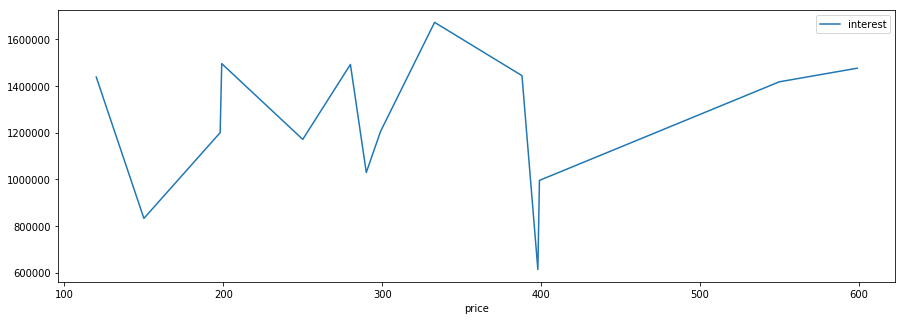

In [90]:
DiscountType1=promotionDataInteresting[promotionDataInteresting["DiscountType"]=="任選優惠價"]
caculateList=Caculate(DiscountType1["PromotionCondition_DiscountPrice"],DiscountType1["Interest per day"])
tempDic={"price":caculateList[0],"interest":caculateList[1]}
tempPan=pd.DataFrame(tempDic)
tempPan=tempPan.sort_values(by="price")
tempPan=tempPan.set_index("price")
tempPan.plot(figsize=(15,5))

In [128]:
DiscountType2=promotionDataInteresting[promotionDataInteresting["DiscountType"]=="滿件打折"]
DiscountType2=DiscountType2[DiscountType2["PromotionCondition_DiscountRate"]!=0]
DiscountType2[DiscountType2["PromotionCondition_TotalQty"]!=2]

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime,Interest per day,newcustomer per day,wake up customer per day,lenn,summ
134,67076,滿件打折,0.0,0.79,0.0,4,2017-08-16 11:00:00.000,2017-08-18 12:59:00.000,1.021313e+06,345.500000,692.000000,2,691
138,67366,滿件打折,0.0,0.79,0.0,4,2017-08-18 13:00:00.000,2017-08-31 10:59:00.000,1.138353e+06,366.307692,750.769231,13,4762
142,68609,滿件打折,0.0,0.79,0.0,4,2017-08-31 11:00:00.000,2017-09-15 10:59:00.000,1.128324e+06,372.133333,769.866667,15,5582


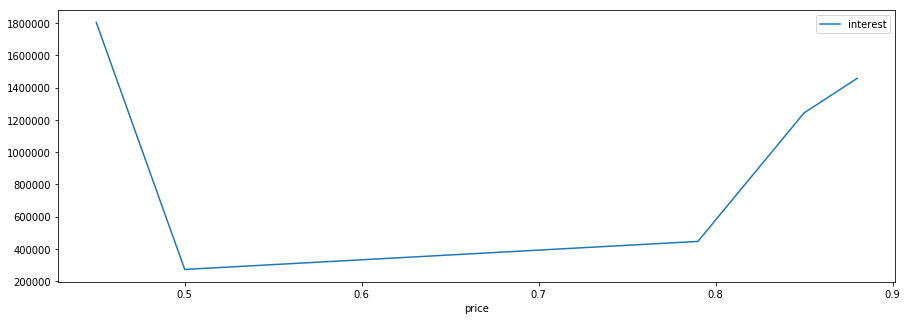

In [129]:
DiscountType2=promotionDataInteresting[promotionDataInteresting["DiscountType"]=="滿件打折"]
DiscountType2=DiscountType2[DiscountType2["PromotionCondition_TotalQty"]==2]
caculateList=Caculate(DiscountType2["PromotionCondition_DiscountRate"],DiscountType2["Interest per day"])
tempDic={"price":caculateList[0],"interest":caculateList[1]}
tempPan=pd.DataFrame(tempDic)
tempPan=tempPan.sort_values(by="price")
tempPan=tempPan.set_index("price")
tempPan.plot(figsize=(15,5))

In [115]:
DiscountType3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 144 to 230
Data columns (total 13 columns):
PromotionId                         41 non-null object
DiscountType                        41 non-null object
PromotionCondition_DiscountPrice    41 non-null float64
PromotionCondition_DiscountRate     41 non-null float64
PromotionCondition_TotalPrice       41 non-null float64
PromotionCondition_TotalQty         41 non-null int64
PromotionStartDateTime              41 non-null object
PromotionEndDateTime                41 non-null object
Interest per day                    41 non-null float64
newcustomer per day                 41 non-null float64
wake up customer per day            41 non-null float64
lenn                                41 non-null int64
summ                                41 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 4.5+ KB


In [120]:
tempPan

,interest
price,
100.01000.0,1.216674e+06
100.0800.0,1.595370e+06
100.0888.0,6.020827e+06
100.0899.0,1.950429e+06
111.01111.0,1.840787e+06
120.01000.0,2.562900e+06
120.01200.0,1.464348e+06
150.01000.0,1.846792e+06
150.01200.0,1.430817e+06


c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

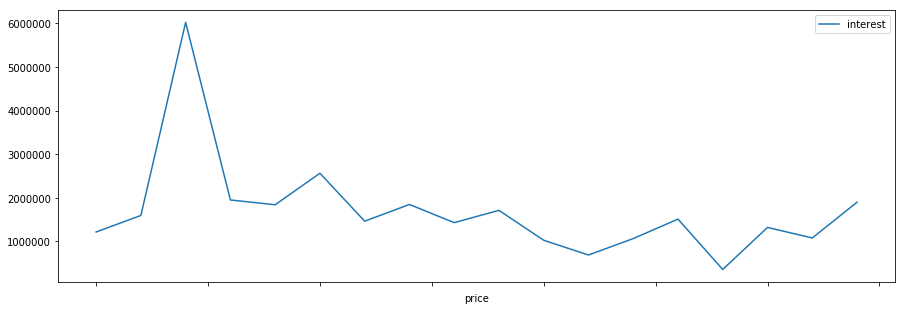

In [119]:
DiscountType3=promotionDataInteresting[promotionDataInteresting["DiscountType"]=="滿額折現"]
DiscountType3["PromotionCondition_DiscountPrice"]=DiscountType3["PromotionCondition_DiscountPrice"].astype(str)
DiscountType3["PromotionCondition_TotalPrice"]=DiscountType3["PromotionCondition_TotalPrice"].astype(str)
DiscountType3["PromotionConditionData"]=DiscountType3["PromotionCondition_DiscountPrice"]+DiscountType3["PromotionCondition_TotalPrice"]
caculateList=Caculate(DiscountType3["PromotionConditionData"],DiscountType3["Interest per day"])
tempDic={"price":caculateList[0],"interest":caculateList[1]}
tempPan=pd.DataFrame(tempDic)
tempPan=tempPan.sort_values(by="price")
tempPan=tempPan.dropna()
tempPan=tempPan.set_index("price")
tempPan.plot(figsize=(15,5))

In [132]:
ooo=list(set(promotionDataInteresting["DiscountType"]))
ooo.sort()
ooo

['任選優惠價', '會員滿額打折', '滿件打折', '滿件折現', '滿額打折', '滿額折現', '滿額贈']

In [135]:
DiscountType4=promotionDataInteresting[promotionDataInteresting["DiscountType"]=="會員滿額打折"]
DiscountType4

,PromotionId,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime,Interest per day,newcustomer per day,wake up customer per day,lenn,summ
145,70160,會員滿額打折,0.0,0.9,1.0,0,2017-09-11 16:00:00.000,2019-09-11 21:57:11.303,1.358528e+06,385.291667,828.638889,216,83223
146,70161,會員滿額打折,0.0,0.9,2500.0,0,2017-09-11 16:00:00.000,2019-09-11 21:58:53.140,1.358528e+06,385.291667,828.638889,216,83223


c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

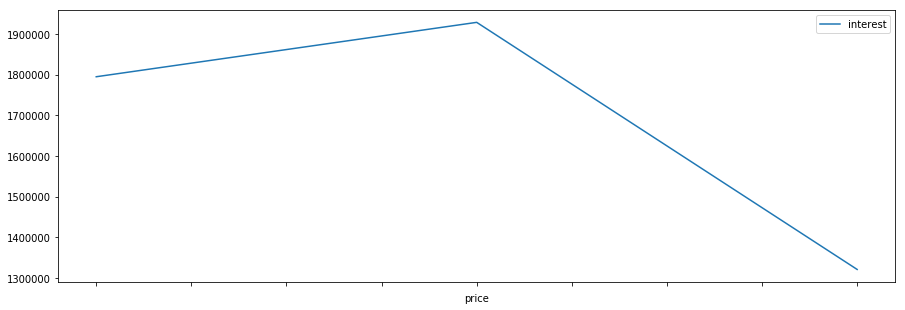

In [141]:
DiscountType5=promotionDataInteresting[promotionDataInteresting["DiscountType"]=="滿件折現"]
DiscountType5["PromotionCondition_DiscountPrice"]=DiscountType5["PromotionCondition_DiscountPrice"].astype(str)
DiscountType5["PromotionCondition_TotalQty"]=DiscountType5["PromotionCondition_TotalQty"].astype(str)
DiscountType5["PromotionConditionData"]=DiscountType5["PromotionCondition_DiscountPrice"]+DiscountType5["PromotionCondition_TotalQty"]
caculateList=Caculate(DiscountType5["PromotionConditionData"],DiscountType5["Interest per day"])
tempDic={"price":caculateList[0],"interest":caculateList[1]}
tempPan=pd.DataFrame(tempDic)
tempPan=tempPan.sort_values(by="price")
tempPan=tempPan.dropna()
tempPan=tempPan.set_index("price")
tempPan.plot(figsize=(15,5))

c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\alex\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

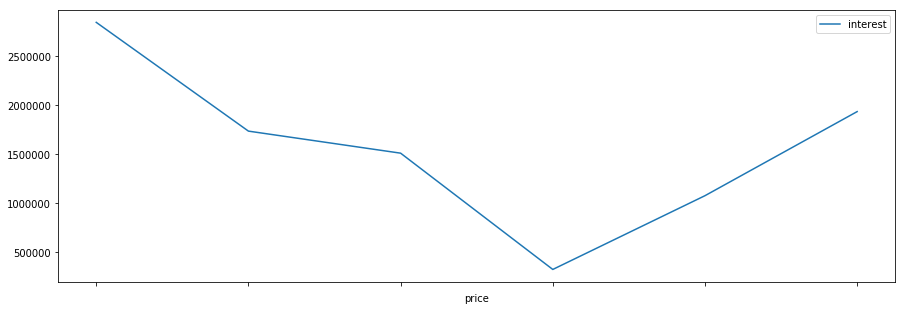

In [142]:
DiscountType6=promotionDataInteresting[promotionDataInteresting["DiscountType"]=="滿額打折"]
DiscountType6["PromotionCondition_DiscountRate"]=DiscountType6["PromotionCondition_DiscountRate"].astype(str)
DiscountType6["PromotionCondition_TotalPrice"]=DiscountType6["PromotionCondition_TotalPrice"].astype(str)
DiscountType6["PromotionConditionData"]=DiscountType6["PromotionCondition_DiscountRate"]+DiscountType6["PromotionCondition_TotalPrice"]
caculateList=Caculate(DiscountType6["PromotionConditionData"],DiscountType6["Interest per day"])
tempDic={"price":caculateList[0],"interest":caculateList[1]}
tempPan=pd.DataFrame(tempDic)
tempPan=tempPan.sort_values(by="price")
tempPan=tempPan.dropna()
tempPan=tempPan.set_index("price")
tempPan.plot(figsize=(15,5))

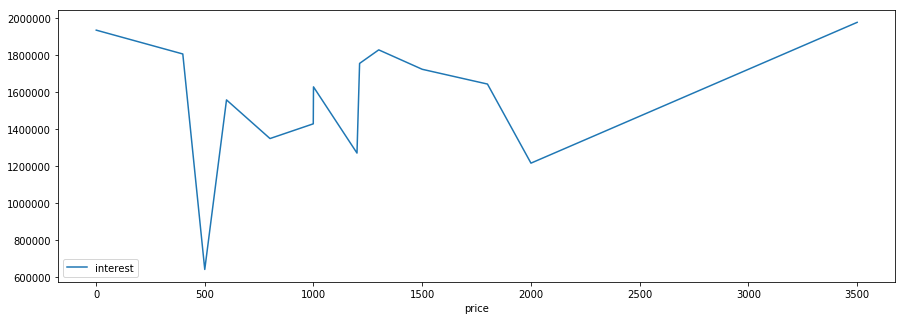

In [139]:
DiscountType7=promotionDataInteresting[promotionDataInteresting["DiscountType"]=="滿額贈"]
caculateList=Caculate(DiscountType7["PromotionCondition_TotalPrice"],DiscountType7["Interest per day"])
tempDic={"price":caculateList[0],"interest":caculateList[1]}
tempPan=pd.DataFrame(tempDic)
tempPan=tempPan.sort_values(by="price")
tempPan=tempPan.set_index("price")
tempPan.plot(figsize=(15,5))